# Looking at the Answerable TyDi QA dataset

Imports

In [35]:
from datasets import load_dataset

Load dataset

In [36]:
dataset = load_dataset("copenlu/answerable_tydiqa")
train_set = dataset["train"]
validation_set = dataset["validation"]

Let's look at some statistics


In [37]:
# Define the languages of interest
languages = ["arabic", "bengali", "indonesian"]

In [38]:

# Initialize dictionaries to store statistics for each language
statistics = {}

# Loop through each language
for language in languages:
    # Get the training and validation data for the current language
    train_set = dataset["train"].filter(lambda example: example["language"] == language)
    validation_set = dataset["validation"].filter(lambda example: example["language"] == language)
    
    # Calculate basic statistics for training data
    num_train_examples = len(train_set)
    num_train_contexts = len(set(train_set["document_title"]))
    num_train_questions = len(set(train_set["question_text"]))
                                                
    # Calculate basic statistics for validation data
    num_validation_examples = len(validation_set)
    num_validation_contexts = len(set(validation_set["document_title"]))
    num_validation_questions = len(set(validation_set["question_text"]))
    
    # Store the statistics
    statistics[language] = {
        "Train Data": {
            "Number of Examples": num_train_examples,
            "Number of Contexts": num_train_contexts,
            "Number of Questions": num_train_questions,
        },
        "Validation Data": {
            "Number of Examples": num_validation_examples,
            "Number of Contexts": num_validation_contexts,
            "Number of Questions": num_validation_questions,
        }
    }

# Print the statistics
for language, stats in statistics.items():
    print(f"Statistics for {language.capitalize()} language:")
    for split, values in stats.items():
        print(f"{split}:")
        for stat_name, value in values.items():
            print(f"{stat_name}: {value}")
        print()

Statistics for Arabic language:
Train Data:
Number of Examples: 29598
Number of Contexts: 8527
Number of Questions: 14805

Validation Data:
Number of Examples: 1902
Number of Contexts: 812
Number of Questions: 951

Statistics for Bengali language:
Train Data:
Number of Examples: 4779
Number of Contexts: 1126
Number of Questions: 2376

Validation Data:
Number of Examples: 224
Number of Contexts: 90
Number of Questions: 112

Statistics for Indonesian language:
Train Data:
Number of Examples: 11394
Number of Contexts: 3273
Number of Questions: 5702

Validation Data:
Number of Examples: 1191
Number of Contexts: 520
Number of Questions: 597



Let's visualize it

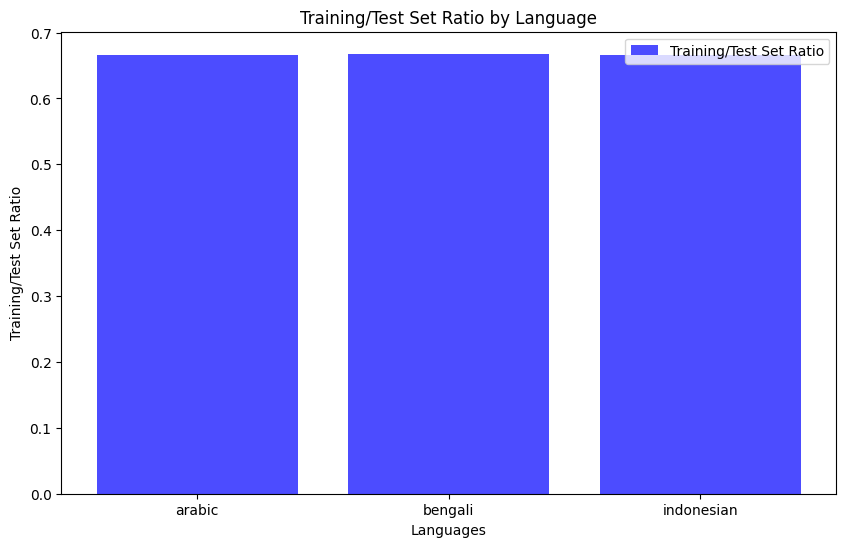

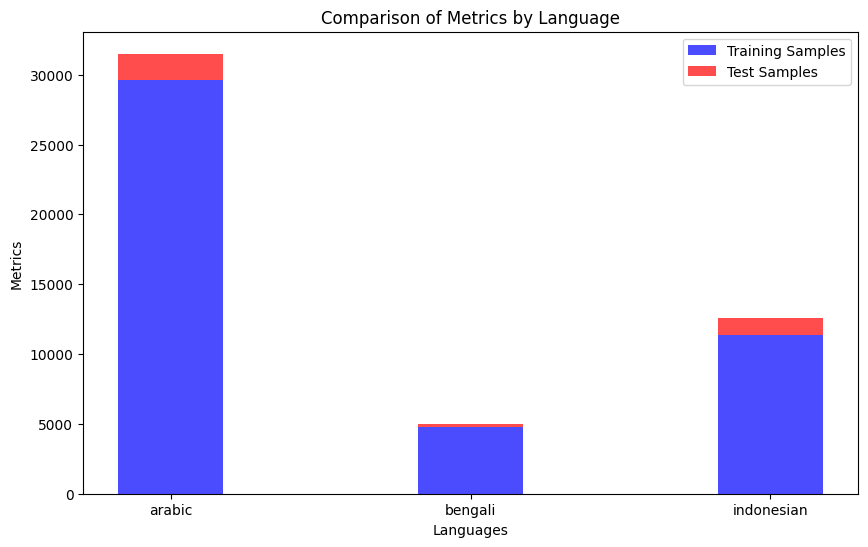

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the training/test set ratios and number of samples for each language
training_ratios = [stats["Train Data"]["Number of Examples"] / (stats["Train Data"]["Number of Examples"] + stats["Train Data"]["Number of Questions"]) for stats in statistics.values()]
num_samples = [stats["Train Data"]["Number of Examples"] for stats in statistics.values()]


# Create a bar plot for the training/test set ratio for each language
plt.figure(figsize=(10, 6))
plt.bar(languages, training_ratios, color='b', alpha=0.7)
plt.title('Training/Test Set Ratio by Language')
plt.ylabel('Training/Test Set Ratio')
plt.xlabel('Languages')
plt.legend(['Training/Test Set Ratio'])
plt.show()
# Create a composite bar plot for both metrics for each language
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(languages))

# Plot the training samples
plt.bar(index, num_samples, bar_width, label='Training Samples', color='b', alpha=0.7)

# Plot the test samples on top of the training samples
plt.bar(index, [stats["Validation Data"]["Number of Examples"] for stats in statistics.values()], bar_width, label='Test Samples', bottom=num_samples, color='r', alpha=0.7)

plt.xlabel('Languages')
plt.ylabel('Metrics')
plt.title('Comparison of Metrics by Language')
plt.xticks(index, languages)
plt.legend()
plt.show()

Filter:   0%|          | 0/11394 [00:00<?, ? examples/s]

Filter: 100%|██████████| 11394/11394 [00:00<00:00, 19878.37 examples/s]


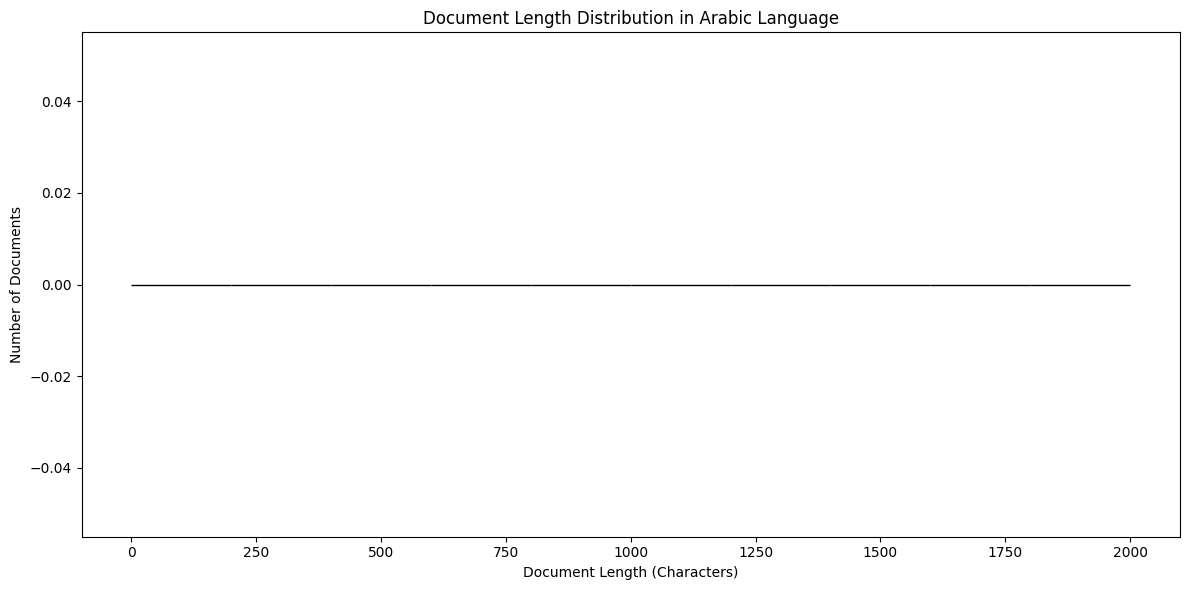

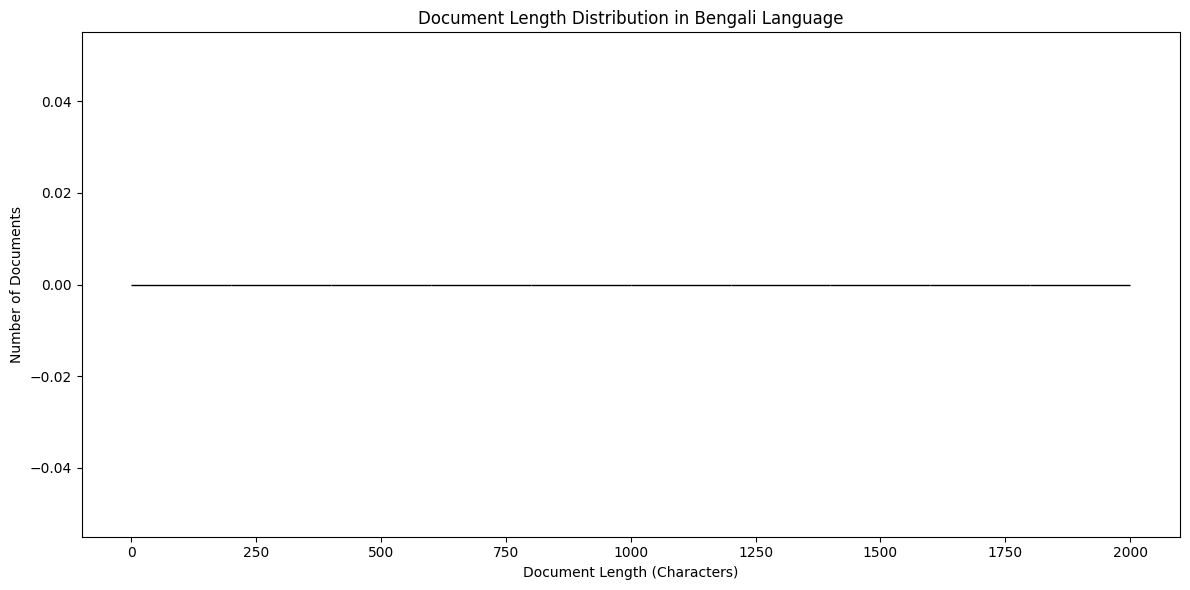

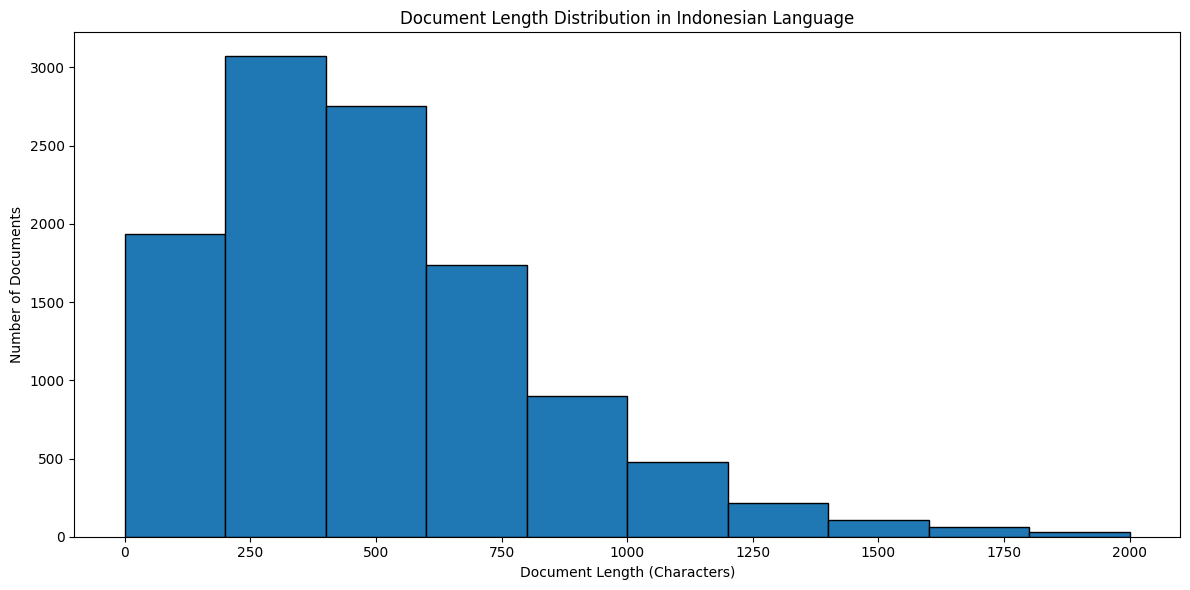

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset

# Initialize dictionaries to store document lengths for each language
document_lengths = {}

# Define the bucket boundaries
buckets = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Calculate document lengths and store them in the dictionary for each language
for language in languages:
    language_train_set = train_set.filter(lambda example: example["language"] == language)
    document_lengths[language] = [len(doc) for doc in language_train_set["document_plaintext"]]

# Create subplots for each language
for language in languages:
    plt.figure(figsize=(12, 6))
    
    # Plot the bucket histogram
    plt.hist(document_lengths[language], bins=buckets, edgecolor='black')
    
    # Set labels and title
    plt.xlabel('Document Length (Characters)')
    plt.ylabel('Number of Documents')
    plt.title(f'Document Length Distribution in {language.capitalize()} Language')
 
    # Show the plot
    plt.tight_layout()
    plt.show()


Now do some modeling